In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from matplotlib.ticker import FuncFormatter
import seaborn as sns

In [2]:
%matplotlib inline
sns.set_theme(rc={"figure.figsize": [20,5]},
              style='dark')
sns.set_context(context='notebook')
plt.style.use('dark_background')

In [3]:
activo = 'BTC-USD'
df = yf.Ticker(activo)
df = df.history(start='2020-01-01')
df.reset_index(inplace=True)
df['Date'] = df['Date'].dt.tz_localize(None)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,18565664997,0.0,0.0
1,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,20802083465,0.0,0.0
2,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,28111481032,0.0,0.0
3,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,18444271275,0.0,0.0
4,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,19725074095,0.0,0.0
...,...,...,...,...,...,...,...,...
1825,2024-12-30,93527.195312,94903.320312,91317.132812,92643.210938,56188003691,0.0,0.0
1826,2024-12-31,92643.250000,96090.601562,91914.031250,93429.203125,43625106843,0.0,0.0
1827,2025-01-01,93425.101562,94929.867188,92788.125000,94419.757812,24519888919,0.0,0.0
1828,2025-01-02,94416.289062,97739.820312,94201.570312,96886.875000,46009564411,0.0,0.0


In [4]:
daily_purchase_amount = 10
df['DCA'] = (daily_purchase_amount / df['Close']).cumsum()
df['Value'] = df['DCA'] * df['Close']
df['Invested'] = daily_purchase_amount * (df.index + 1)
df['Drawdown'] = 1 - (df['Value'] / df['Value'].cummax())
df['ROI'] = (df['Value'] / df['Invested'] - 1)
df.head(5)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,DCA,Value,Invested,Drawdown,ROI
0,2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,18565664997,0.0,0.0,0.001389,10.000000,10,0.0,0.000000
1,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,20802083465,0.0,0.0,0.002820,19.701807,20,0.0,-0.014910
2,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,28111481032,0.0,0.0,0.004182,30.715498,30,0.0,0.023850
3,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,18444271275,0.0,0.0,0.005531,40.990551,40,0.0,0.024764
4,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,19725074095,0.0,0.0,0.006881,50.994205,50,0.0,0.019884


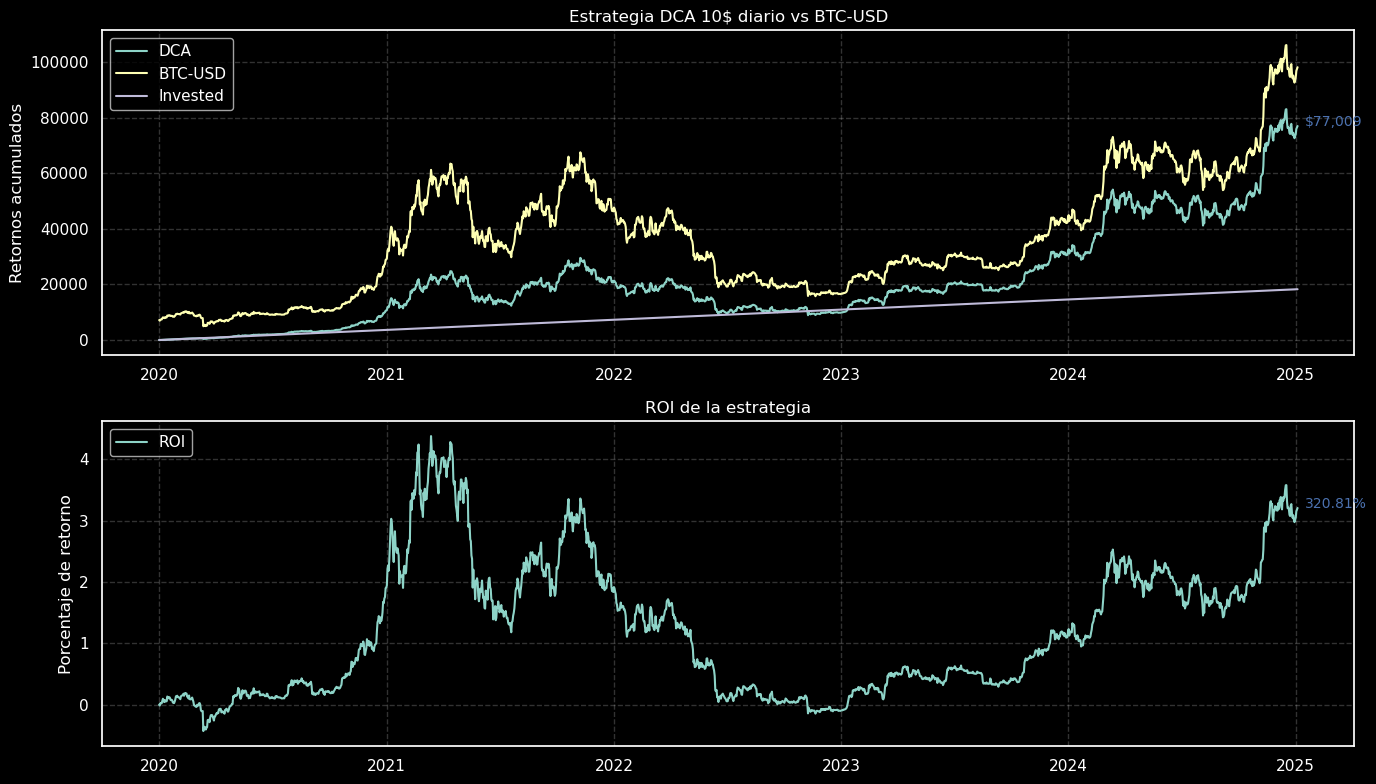

In [5]:
fig, ax = plt.subplots(2,1, figsize=(14, 8))

#DCA Estrategy
# ax[0].fill_between(df['Date'], df['Drawdown'],0 , 
#                        color='r', alpha=0.25, label='Drawdown')

last_value = df.iloc[-1]['Value']
ax[0].plot(df['Date'], df['Value'], label="DCA")
ax[0].plot( df['Date'] , df['Close'], label='BTC-USD')
ax[0].plot(df['Date'], df['Invested'], label='Invested')
ax[0].annotate(f"${last_value:,.0f}", xy=(df.iloc[-1]['Date'], last_value), 
               xytext=(5, 0), textcoords="offset points", color="b", fontsize=10)
ax[0].set_title("Estrategia DCA 10$ diario vs BTC-USD")
ax[0].set_ylabel("Retornos acumulados", fontsize=12)
ax[0].legend()
ax[0].grid(True, linestyle='--', alpha=0.2)

# ROI
last_value = df.iloc[-1]['ROI']
ax[1].plot(df['Date'], df['ROI'], label='ROI')
ax[1].set_title("ROI de la estrategia")
ax[1].set_ylabel("Porcentaje de retorno", fontsize=12)
ax[1].legend(loc="upper left")
ax[1].grid(True, linestyle='--', alpha=0.2)
ax[1].annotate(f"{last_value:.2%}", xy=(df.iloc[-1]['Date'], last_value), 
               xytext=(5, 0), textcoords="offset points", color="b", fontsize=10)


plt.tight_layout()
plt.show()


### Version 1 

In [6]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from datetime import datetime

In [7]:
activo = 'BTC-USD'
df = yf.Ticker(activo)
df = df.history(start="2022-01-01")['Close'].dropna()
df = pd.DataFrame(df)
df

,Close
Date,
2022-01-01 00:00:00+00:00,47686.812500
2022-01-02 00:00:00+00:00,47345.218750
2022-01-03 00:00:00+00:00,46458.117188
2022-01-04 00:00:00+00:00,45897.574219
2022-01-05 00:00:00+00:00,43569.003906
...,...
2024-12-30 00:00:00+00:00,92643.210938
2024-12-31 00:00:00+00:00,93429.203125
2025-01-01 00:00:00+00:00,94419.757812


In [8]:
quantity = 5

resampled_df = df.resample("D").last()
days_since_start = (resampled_df.index - resampled_df.index[0]).days

resampled_df['Shares'] = quantity/resampled_df['Close']
resampled_df['Cumulative Shares'] = resampled_df['Shares'].cumsum()
resampled_df['Cumulative Value'] = resampled_df['Cumulative Shares'] * resampled_df['Close']

resampled_df['Invested'] = quantity * (days_since_start + 1)
resampled_df['ROI'] = (resampled_df['Cumulative Value'] / resampled_df['Invested'] - 1)

resampled_df.tail()

,Close,Shares,Cumulative Shares,Cumulative Value,Invested,ROI
Date,,,,,,
2024-12-31 00:00:00+00:00,93429.203125,0.000054,0.168154,15710.538551,5480,1.866887
2025-01-01 00:00:00+00:00,94419.757812,0.000053,0.168207,15882.104754,5485,1.895552
2025-01-02 00:00:00+00:00,96886.875000,0.000052,0.168259,16302.092194,5490,1.969416
2025-01-03 00:00:00+00:00,NaN,NaN,NaN,NaN,5495,NaN
2025-01-04 00:00:00+00:00,98170.765625,0.000051,0.168310,16523.118393,5500,2.004203


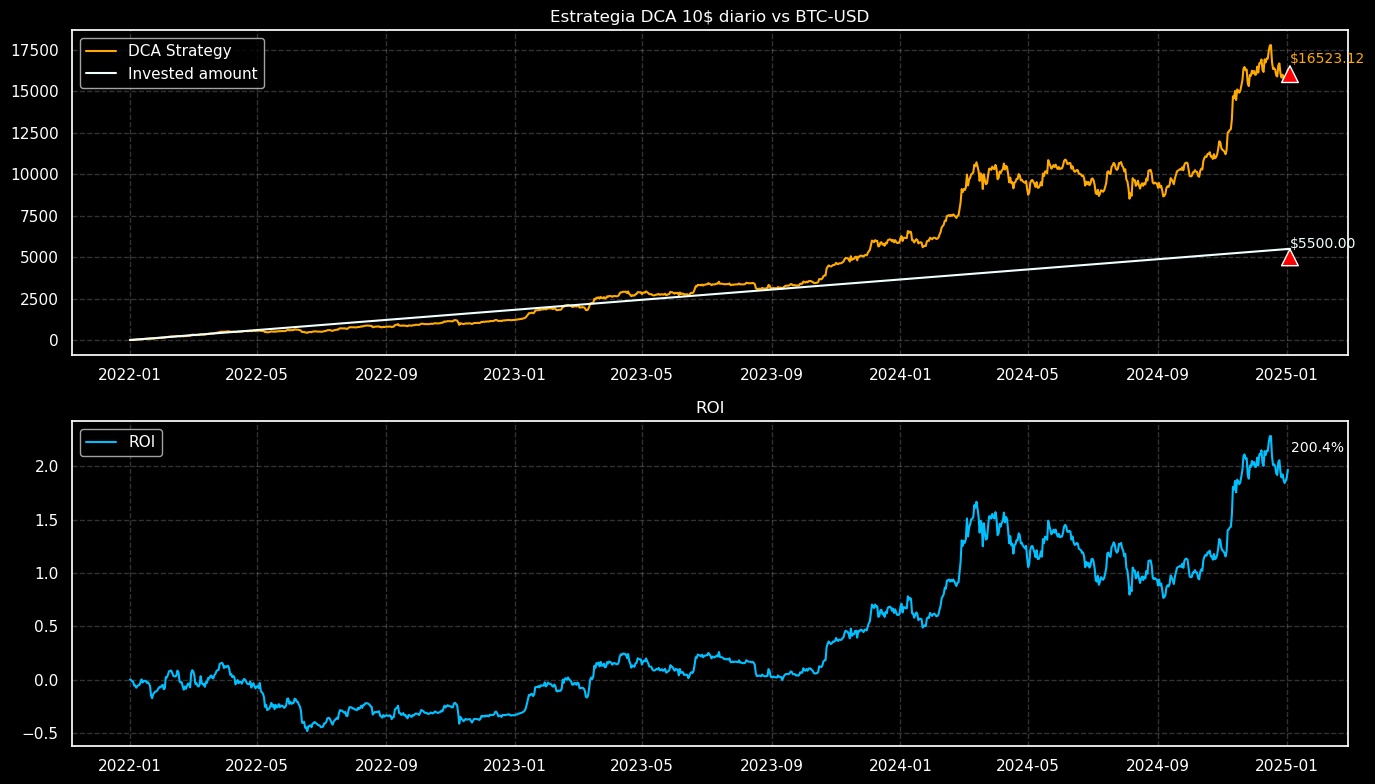

In [9]:
fig, ax = plt.subplots(2,1, figsize=(14,8))



# Ploting DCA
ax[0].plot(resampled_df['Cumulative Value'], label='DCA Strategy', color='#ffaa00')
ax[0].plot(resampled_df['Invested'], label='Invested amount', color='#F0FFFF')
#ax[0].plot(resampled_df['Close'], label='BTC-USD')
ax[0].set_title("Estrategia DCA 10$ diario vs BTC-USD")
ax[0].legend()
ax[0].grid(True, linestyle='--', alpha=0.2)

last_value = resampled_df['Cumulative Value'].iloc[-1]
ax[0].annotate(f'${last_value:.2f}', xy=(resampled_df.index[-1], last_value),
               xytext=(resampled_df.index[-1], last_value + last_value * 0.01),
               arrowprops=dict(facecolor='red', shrink=0.1), fontsize=10, ha='left', color='#ffaa00')

last_value = resampled_df['Invested'].iloc[-1]
ax[0].annotate(f'${last_value:.2f}', xy=(resampled_df.index[-1], last_value),
               xytext=(resampled_df.index[-1], last_value + last_value * 0.01),
               arrowprops=dict(facecolor='red', shrink=0.1), fontsize=10, ha='left', color='#F0FFFF')


# Ploting ROI
ax[1].plot(resampled_df['ROI'], label='ROI', color='#00BFFF')
ax[1].set_title("ROI")
ax[1].legend(loc="upper left")
ax[1].grid(True, linestyle='--', alpha=0.2)

last_value = resampled_df['ROI'].iloc[-1]
# ax[1].annotate(f'{last_value:.2%}', xy=(resampled_df.index[-1], last_value),
#                xytext=(resampled_df.index[-1], last_value + last_value * 0.05),
#                fontsize=10, ha='left')
ax[1].annotate(f'{last_value:.1%}', xy=(resampled_df.index[-1], last_value),
               xytext=(1,10),textcoords="offset points", fontsize=10, ha='left')

plt.tight_layout()
plt.show()

### Version 2

In [13]:
activo = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'BNB-USD']

df = yf.download(activo, start="2022-01-01")['Close'].dropna()
df

[*********************100%***********************]  4 of 4 completed


Ticker,BNB-USD,BTC-USD,ETH-USD,XRP-USD
Date,,,,
2022-01-01 00:00:00+00:00,527.352722,47686.812500,3769.697021,0.849472
2022-01-02 00:00:00+00:00,531.396667,47345.218750,3829.564941,0.859118
2022-01-03 00:00:00+00:00,512.135986,46458.117188,3761.380371,0.832885
2022-01-04 00:00:00+00:00,507.506104,45897.574219,3794.056641,0.824673
2022-01-05 00:00:00+00:00,475.056946,43569.003906,3550.386963,0.774358
...,...,...,...,...
2024-12-30 00:00:00+00:00,704.146301,92643.210938,3356.392578,2.057571
2024-12-31 00:00:00+00:00,700.986877,93429.203125,3332.531738,2.080128
2025-01-01 00:00:00+00:00,706.512939,94419.757812,3353.504150,2.322341


In [14]:
quantity = 5

resampled_df = df.resample("D").last()
days_since_start = (resampled_df.index - resampled_df.index[0]).days

shares = quantity / resampled_df
comulative_shares = shares.cumsum()
comulative_values = comulative_shares * resampled_df

invested = pd.DataFrame(data={ticker: (days_since_start + 1) * quantity 
                              for ticker in comulative_values.columns},
                        index=comulative_values.index)


roi = (comulative_values / invested - 1)



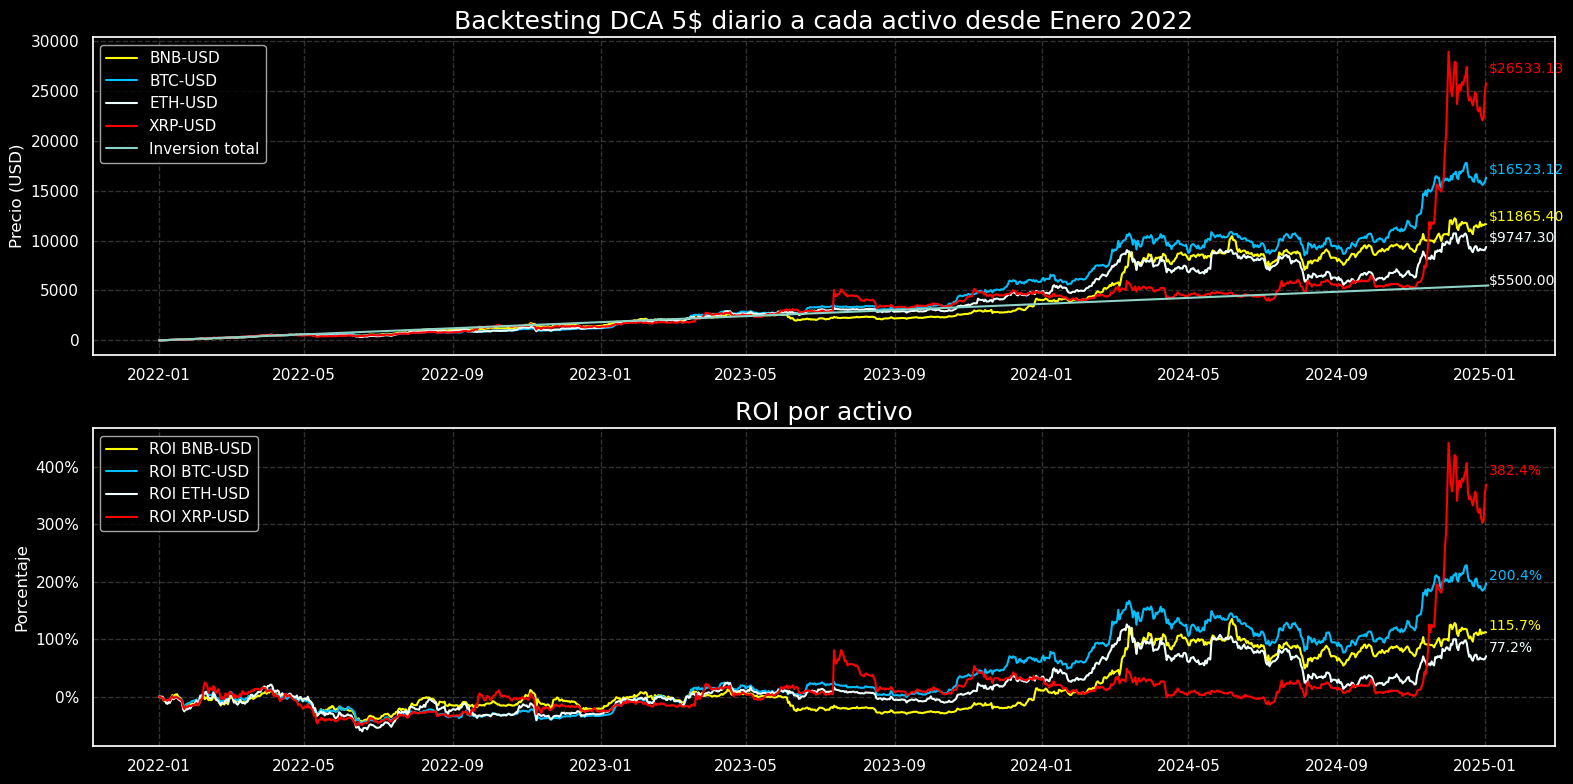

In [17]:
import matplotlib.ticker as mticker

fig, ax = plt.subplots(2,1, figsize=(16,8))

colors=['#ffff00','#00BFFF', '#F0FFFF', '#FF0000']
#colors=['#ffff00','#00BFFF','#F0FFFF']

#DCA
for i, column in enumerate(comulative_values.columns):
    ax[0].plot(comulative_values.index, comulative_values[column], label=column, color=colors[i])

    last_value = comulative_values[column].iloc[-1]
    ax[0].annotate(f'${last_value:.2f}', xy=(comulative_values.index[-1], last_value),
               xytext=(comulative_values.index[-1], last_value + last_value * 0.01),
                fontsize=10, ha='left', color=colors[i])

# Inversion
ax[0].plot(invested['BNB-USD'], label='Inversion total')
last_value = invested['BNB-USD'].iloc[-1]

ax[0].annotate(f'${last_value:.2f}', xy=(invested.index[-1], last_value),
               xytext=(invested.index[-1], last_value + last_value * 0.01),
                fontsize=10, ha='left')

ax[0].set_ylabel("Precio (USD)")
ax[0].set_title(f"Backtesting DCA {quantity}$ diario a cada activo desde Enero 2022", fontsize=18)
ax[0].legend()
ax[0].grid(True, linestyle='--', alpha=0.2)


#ROI
for i, column in enumerate(roi.columns):
    ax[1].plot(roi.index, roi[column], label=f'ROI {column}', color=colors[i])

    last_value = roi[column].iloc[-1]
    ax[1].annotate(f'{last_value:.1%}', xy=(roi.index[-1], last_value),
               xytext=(roi.index[-1], last_value + last_value * 0.01),
               fontsize=10, ha='left', color=colors[i])

ax[1].yaxis.set_major_formatter(mticker.PercentFormatter(xmax=1))

ax[1].set_ylabel("Porcentaje")
ax[1].set_title("ROI por activo", fontsize=18)
ax[1].legend(loc="upper left")
ax[1].grid(True, linestyle='--', alpha=0.2)


plt.tight_layout()
plt.show()